In [ ]:
!pip install ydata-profiling
!pip install --upgrade Pillow

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
df = pd.read_csv('banana_quality.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [ ]:
df['Quality'] = df['Quality'].apply(lambda x: 1 if x =='Good' else 0)

In [ ]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725,0.500750
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467,0.500031
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977,0.000000
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450,0.000000
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735,1.000000
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063,1.000000
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633,1.000000


In [ ]:
for c in df.columns:
  minimum = df[c].min()
  maximum = df[c].max()
  if minimum == 0 and maximum == 1:
    continue
  df[c] = df[c] + abs(minimum)
  df[c] = df[c] / df[c].max()

In [ ]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.454025,0.538720,0.405327,0.456874,0.491854,0.559170,0.526626,0.500750
std,0.133762,0.144380,0.139440,0.135862,0.144025,0.144102,0.146654,0.500031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.358223,0.433973,0.309638,0.353194,0.393078,0.466797,0.421874,0.000000
50%,0.444650,0.531011,0.387404,0.471155,0.478661,0.571701,0.532382,1.000000
75%,0.541822,0.648764,0.482708,0.559602,0.582642,0.660079,0.633627,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Software Engineer'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

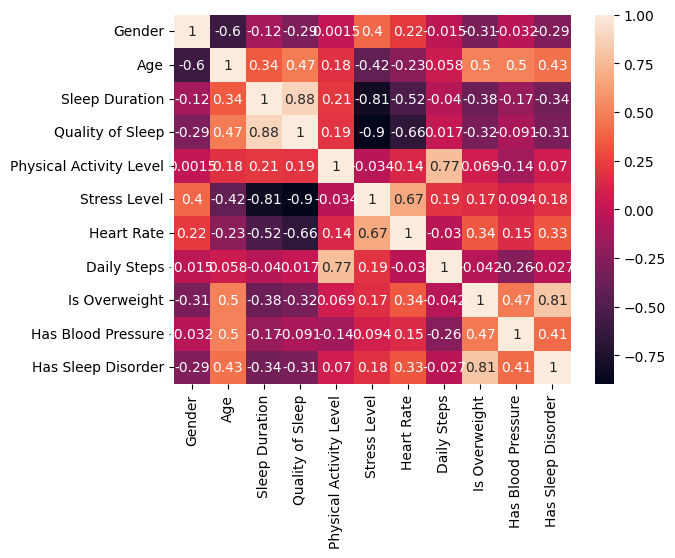

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [39]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [40]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Is Overweight'] = df['BMI Category'].map(
    {
        'Normal': 0,
        'Overweight':1,
        'Normal Weight':0,
        'Obese':2
    }
)
def is_high(blood_pressure):
  blood_pressure = blood_pressure.split('/')
  if int(blood_pressure[0]) > 120 and int(blood_pressure[1]) > 80:
    return 1
  if int(blood_pressure[0]) > 120 or int(blood_pressure[1]) > 80:
    return .5
  return 0
df['Has High Blood Pressure'] = df['Blood Pressure'].apply(is_high)
df['Has A Sleep Disorder'] = df['Sleep Disorder'].isnull().apply(lambda x: 0 if x else 1)

In [41]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Is Overweight,Has High Blood Pressure,Has A Sleep Disorder
0,1,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,1,1.0,0
1,2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,0,0.5,0
2,3,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,0,0.5,0
3,4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,2,1.0,1
4,5,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,2,1.0,1


In [42]:
profile = ProfileReport(df.drop(['Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'], axis=1), title="Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]